In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('rfm_data.csv')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location
0,8814,2023-04-11,943.31,Product C,890075,Tokyo
1,2188,2023-04-11,463.70,Product A,176819,London
2,4608,2023-04-11,80.28,Product A,340062,New York
3,2559,2023-04-11,221.29,Product A,239145,London
4,9482,2023-04-11,739.56,Product A,194545,Paris


In [66]:
df.isnull().sum()

CustomerID            0
PurchaseDate          0
TransactionAmount     0
ProductInformation    0
OrderID               0
Location              0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          1000 non-null   int64  
 1   PurchaseDate        1000 non-null   object 
 2   TransactionAmount   1000 non-null   float64
 3   ProductInformation  1000 non-null   object 
 4   OrderID             1000 non-null   int64  
 5   Location            1000 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [4]:
df.describe()

,CustomerID,TransactionAmount,OrderID
count,1000.000000,1000.00000,1000.000000
mean,5554.789000,513.67781,554071.398000
std,2605.014863,286.09870,264695.448814
min,1011.000000,12.13000,100096.000000
25%,3273.000000,257.12000,313152.000000
50%,5538.000000,523.56500,564671.500000
75%,7821.750000,759.86000,783052.250000
max,9991.000000,999.44000,999695.000000


In [69]:
df.shape

(1000, 6)

## Calculating RFM Values

In [5]:
from datetime import datetime
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])

## Calculating Recency

In [6]:
df['Recency'] = (datetime.now().date() - df['PurchaseDate'].dt.date)
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,"313 days, 0:00:00"
1,2188,2023-04-11,463.70,Product A,176819,London,"313 days, 0:00:00"
2,4608,2023-04-11,80.28,Product A,340062,New York,"313 days, 0:00:00"
3,2559,2023-04-11,221.29,Product A,239145,London,"313 days, 0:00:00"
4,9482,2023-04-11,739.56,Product A,194545,Paris,"313 days, 0:00:00"


## Calculating Frequency

In [7]:
frequency_data = df.groupby('CustomerID')['OrderID'].count().reset_index()
frequency_data.rename(columns= {'OrderID': 'Frequency'}, inplace = True)
df = df.merge(frequency_data, on = 'CustomerID', how = 'left')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,"313 days, 0:00:00",1
1,2188,2023-04-11,463.70,Product A,176819,London,"313 days, 0:00:00",1
2,4608,2023-04-11,80.28,Product A,340062,New York,"313 days, 0:00:00",1
3,2559,2023-04-11,221.29,Product A,239145,London,"313 days, 0:00:00",1
4,9482,2023-04-11,739.56,Product A,194545,Paris,"313 days, 0:00:00",1


## Calculating Monetary

In [8]:
monetary_data = df.groupby('CustomerID')['TransactionAmount'].sum().reset_index()
monetary_data.rename(columns={'TransactionAmount': 'MonetaryValue'}, inplace = True)
df = df.merge(monetary_data, on = 'CustomerID', how = 'left')
df.head()

,CustomerID,PurchaseDate,TransactionAmount,ProductInformation,OrderID,Location,Recency,Frequency,MonetaryValue
0,8814,2023-04-11,943.31,Product C,890075,Tokyo,"313 days, 0:00:00",1,943.31
1,2188,2023-04-11,463.70,Product A,176819,London,"313 days, 0:00:00",1,463.70
2,4608,2023-04-11,80.28,Product A,340062,New York,"313 days, 0:00:00",1,80.28
3,2559,2023-04-11,221.29,Product A,239145,London,"313 days, 0:00:00",1,221.29
4,9482,2023-04-11,739.56,Product A,194545,Paris,"313 days, 0:00:00",1,739.56


## Calculating RFM Scores

In [10]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4, 5]

df['RecencyScore'] = pd.cut(df['Recency'], bins = 5, labels= recency_scores)
df['FrequencyScore'] = pd.cut(df['Frequency'], bins = 5, labels= frequency_scores)
df['MonetaryScore'] = pd.cut(df['MonetaryValue'], bins= 5, labels= monetary_scores)

In [11]:
# Convert RFM scores to numeric type
df['RecencyScore'] = df['RecencyScore'].astype(int)
df['FrequencyScore'] = df['FrequencyScore'].astype(int)
df['MonetaryScore'] = df['MonetaryScore'].astype(int)

## RFM Value Segmentation

In [14]:
df['RFM_Score'] = df['RecencyScore'] + df['FrequencyScore'] + df['MonetaryScore']

segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df['Value Segment'] = pd.qcut(df['RFM_Score'], q= 3, labels= segment_labels)

C:\Users\ACER\AppData\Local\Temp\ipykernel_10984\2174834148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)
C:\Users\ACER\AppData\Local\Temp\ipykernel_10984\2174834148.py:7: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)


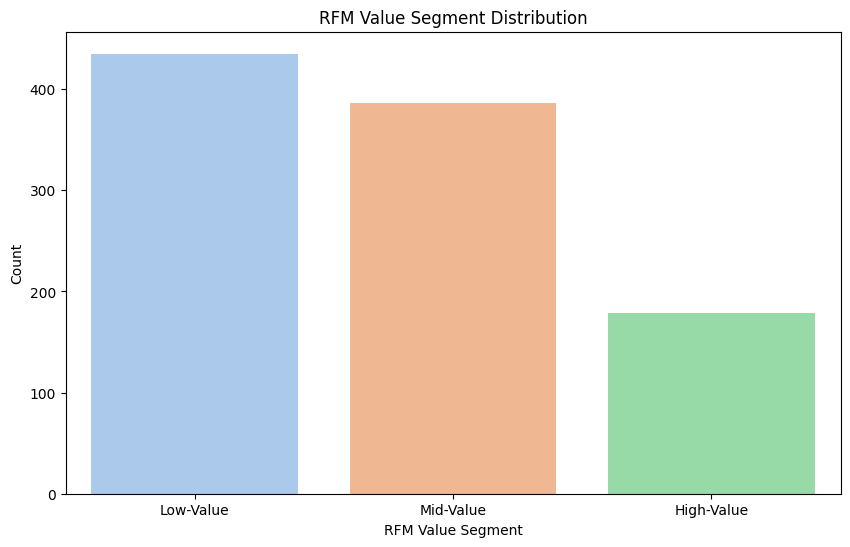

In [15]:
segment_counts = df['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']

pastel_colors = sns.color_palette('pastel')

plt.figure(figsize=(10,6))
sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)

plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')

plt.show()

In [16]:
df['RFM Customer Segments'] = ''

df.loc[df['RFM_Score'] >= 9, 'RFM Customer Segments'] = 'Champions'
df.loc[(df['RFM_Score'] >= 6) & (df['RFM_Score'] < 9), 'RFM Customer Segments'] = 'Potential Loyalists'
df.loc[(df['RFM_Score'] >= 5) & (df['RFM_Score'] < 6), 'RFM Customer Segments'] = 'At-Risk Customers'
df.loc[(df['RFM_Score'] >= 4) & (df['RFM_Score'] < 5), 'RFM Customer Segments'] = 'Cannot Lose'
df.loc[(df['RFM_Score'] >= 3) & (df['RFM_Score'] < 4), 'RFM Customer Segments'] = 'Lost'

## RFM Analysis

In [17]:
segment_product_counts = df.groupby(['Value Segment', 'RFM Customer Segments']).size().reset_index(name = 'Count')
segment_product_counts = segment_product_counts.sort_values('Count', ascending= False)
segment_product_counts = segment_product_counts[segment_product_counts['Count'] > 1]

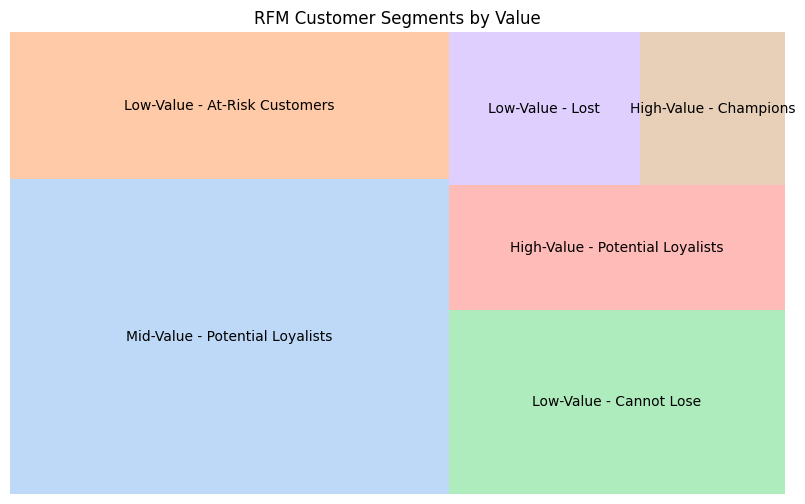

In [20]:
import squarify 
plt.figure(figsize=(10,6))

squarify.plot(sizes = segment_product_counts['Count'],
              label = segment_product_counts.apply(lambda x: f"{x['Value Segment']} - {x['RFM Customer Segments']}", axis= 1),
              color = pastel_colors, 
              alpha = 0.7)

plt.title('RFM Customer Segments by Value')
plt.axis('off')
plt.show()

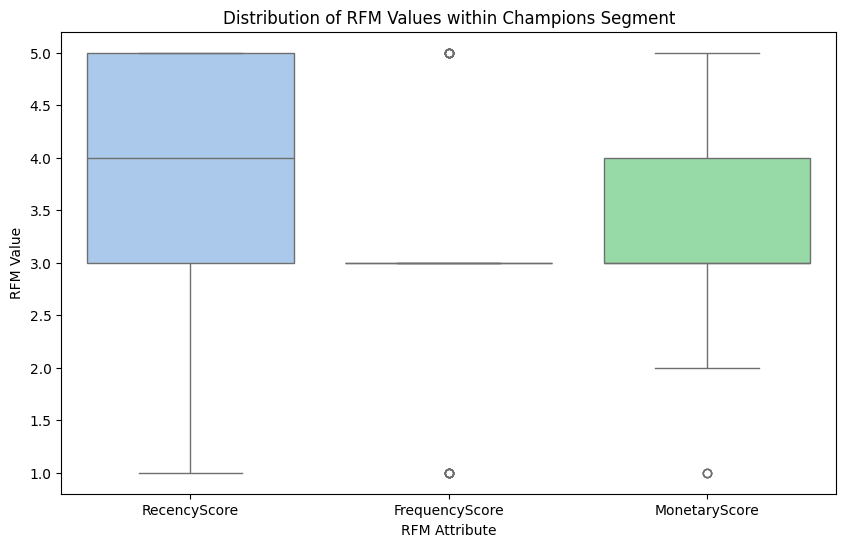

In [21]:
champions_segment = df[df['RFM Customer Segments'] == 'Champions']

plt.figure(figsize= (10,6))
sns.boxplot(data = champions_segment[['RecencyScore', 'FrequencyScore', 'MonetaryScore']], palette= 'pastel')

plt.title('Distribution of RFM Values within Champions Segment')
plt.xlabel('RFM Attribute')
plt.ylabel('RFM Value')

plt.show()

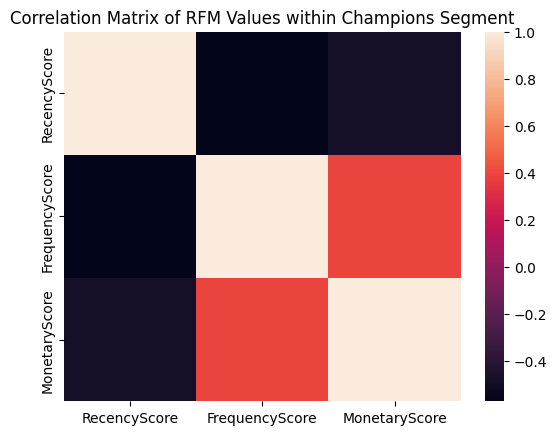

In [22]:
correlation_matrix = champions_segment[['RecencyScore','FrequencyScore', 'MonetaryScore']].corr()

sns.heatmap(data = correlation_matrix)
plt.title('Correlation Matrix of RFM Values within Champions Segment')

plt.show()

C:\Users\ACER\AppData\Local\Temp\ipykernel_10984\2443194723.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')


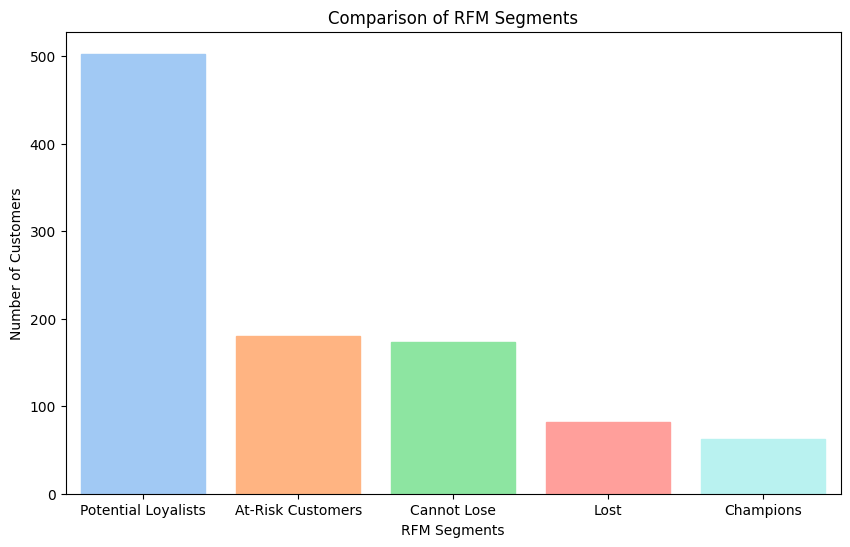

In [23]:
segment_counts = df['RFM Customer Segments'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')

champions_color = pastel_colors[9]
colors = [champions_color if segment == 'Champions' else pastel_colors[i] for i, segment in enumerate(segment_counts.index)]
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])

plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')

ax.yaxis.grid(False)

plt.show()